# <font color='darkblue'>Project: Investigate a TMDb movies Dataset</font>

## <font color='gray'>Table of Contents</font>
<ul>
<li><a href="#intro">1) Introduction</a></li>
<li><a href="#wrangling">2) Data Wrangling</a></li>
<li><a href="#eda">3) Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4) Conclusions</a></li>
</ul>

<a id='intro'></a>
## <font color='crimson'>1) Introduction</font>

> **Overview**:<br>
Movies data set contains information about 10,000 movies collected from The Movie Database (TMDb),<br>
including id, release date, ratings, budget, revenue, cast, director, genres,  runtime and tagline.

> **Questions**:<br>
- Which genres generated the most profit over the time? <br>
- Are more budget provided to movies in 21st century than 20th century? <br>
- What is the most popular movies in 21st century era, what genres is it and what year it released? <br>
- Who is director of the most popular movies in 20th century and the amount of profit that movie got? <br>
- Are there association between the run time and other features?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline  

<a id='wrangling'></a>
## <font color='crimson'>2) Data Wrangling</font>


### Gather and Access data

In [2]:
# import data and print 3 first rows
df = pd.read_csv('movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# see the shape of dataframe
df.shape

(10866, 21)

In [4]:
# schema details of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# descriptive statistics of columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

> Drop Extraneous Columns<br>
Delete Duplicated row(s)<br>
Drop Row(s) with Missing Values

In [6]:
# drop extraneous columns
df.drop(['id', 'imdb_id', 'homepage', 'overview', 'keywords', 'production_companies', 'tagline', 'cast', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [7]:
# confirm changes after drop
df.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [8]:
# view dimensions of dataset
df.shape

(10866, 10)

In [9]:
# no. of duplicated row(s)
print(df.duplicated().sum())

1


In [10]:
# drop duplicatedrow(s)
df.drop_duplicates(inplace=True)

In [11]:
# confirm dedupe
print(df.duplicated().sum())

0


In [12]:
# view missing value count
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [13]:
# drop missing values
df.dropna(inplace=True)

In [14]:
# confirm no missing values (False: no missing values)
df.isnull().sum().any()

False

In [15]:
# save new dataset for next section
df.to_csv('df_v1.csv', index=False)

### Appending Data

> Create new column: Century from release year<br>
Create new column: Profit from Budget - Revenue<br>
Append to dataframe<br>
Choose only first genre appear in each row to reflect the genre of that movie

In [16]:
# read data set version 1
df = pd.read_csv('df_v1.csv')
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [17]:
# dataframe separate to century
cen_20 = df.query('release_year <= 2000')
cen_21 = df.query('release_year > 2000')

In [18]:
# create century array for dataframe
century_20 = np.repeat('20th', cen_20.shape[0])
century_21 = np.repeat('21st', cen_21.shape[0])

In [19]:
# save 2 period of dataframe as 2 csv file
cen_20.to_csv('cen_20.csv', index=False)
cen_21.to_csv('cen_21.csv', index=False)

In [20]:
# read 2 files of 2 centuries dataframe
cen_20 = pd.read_csv('cen_20.csv')
cen_21 = pd.read_csv('cen_21.csv')

In [21]:
# continue appending new arrays to 2 files
cen_20['century'] = century_20
cen_21['century'] = century_21

In [22]:
# combine 2 dataFrames with append
df_cen = cen_20.append(cen_21)

In [23]:
# create new column "profit" by subtract 'budget' from 'revenue'
df_cen['profit'] = df_cen['revenue']-df_cen['budget']
df_cen.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
0,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,1977,3.957559e+07,2.789712e+09,20th,764398007
1,2.379469,14000000,185438673,The Spy Who Loved Me,Lewis Gilbert,125,Adventure|Action|Thriller,1977,5.036893e+07,6.671677e+08,20th,171438673
2,1.719385,1200000,71215869,The Rescuers,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy|Family|Animation|Adventure,1977,4.317337e+06,2.562191e+08,20th,70015869
3,1.179653,4000000,38251425,Annie Hall,Woody Allen,93,Comedy|Drama|Romance,1977,1.439112e+07,1.376203e+08,20th,34251425
4,1.104997,10000000,0,Pete's Dragon,Don Chaffey,128,Fantasy|Animation|Comedy|Family,1977,3.597781e+07,0.000000e+00,20th,-10000000


In [24]:
# save new dataset for next section
df_cen.to_csv('df_v2.csv', index=False)

In [25]:
# read data set version 2
df = pd.read_csv('df_v2.csv')

In [26]:
# get all the hybrids in genres column
hyb = df[df['genres'].str.contains('|')]

In [27]:
# create two copies of the hybrids dataframe
df1 = hyb.copy()  # data on the first genre only
df2 = hyb.copy()  # data from the second genre to the last genre

In [28]:
# apply split function to 'genres' column of each dataframe copy (df1 and df2)
columns = ['genres']
for c in columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])
    df2[c] = df2[c].apply(lambda x: x.split("|")[1:])

In [29]:
# check if df1 on 'genres' column has only first type of genres
df1.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
0,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure,1977,3.957559e+07,2.789712e+09,20th,764398007
1,2.379469,14000000,185438673,The Spy Who Loved Me,Lewis Gilbert,125,Adventure,1977,5.036893e+07,6.671677e+08,20th,171438673
2,1.719385,1200000,71215869,The Rescuers,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy,1977,4.317337e+06,2.562191e+08,20th,70015869
3,1.179653,4000000,38251425,Annie Hall,Woody Allen,93,Comedy,1977,1.439112e+07,1.376203e+08,20th,34251425
4,1.104997,10000000,0,Pete's Dragon,Don Chaffey,128,Fantasy,1977,3.597781e+07,0.000000e+00,20th,-10000000


In [30]:
# save new clean dataset for next section
df1.to_csv('df_clean.csv', index=False)

<a id='eda'></a>

## <font color='crimson'>3) Exploratory Data Analysis</font>

### Exlore the data by statistics and create visualization about the research questions.

In [31]:
# read clean data set
df_c = pd.read_csv('df_clean.csv')
df_c.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
0,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure,1977,3.957559e+07,2.789712e+09,20th,764398007
1,2.379469,14000000,185438673,The Spy Who Loved Me,Lewis Gilbert,125,Adventure,1977,5.036893e+07,6.671677e+08,20th,171438673
2,1.719385,1200000,71215869,The Rescuers,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy,1977,4.317337e+06,2.562191e+08,20th,70015869
3,1.179653,4000000,38251425,Annie Hall,Woody Allen,93,Comedy,1977,1.439112e+07,1.376203e+08,20th,34251425
4,1.104997,10000000,0,Pete's Dragon,Don Chaffey,128,Fantasy,1977,3.597781e+07,0.000000e+00,20th,-10000000


In [32]:
# see dataframe info
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 12 columns):
popularity        10800 non-null float64
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
century           10800 non-null object
profit            10800 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 1012.6+ KB


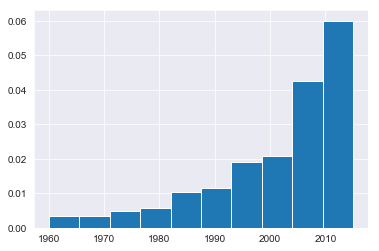

In [33]:
# visualize histogram of release year
df_c.release_year.hist(density=True);

#### <font color='orange'>Through the over years movies were launched more and more.</font>

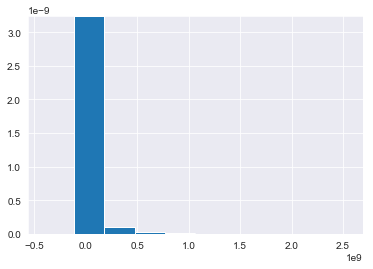

In [34]:
# visualize histogram of profit
df_c.profit.hist(density=True);

#### <font color='orange'>Profit distribution seem to be Right-skewd.</font>

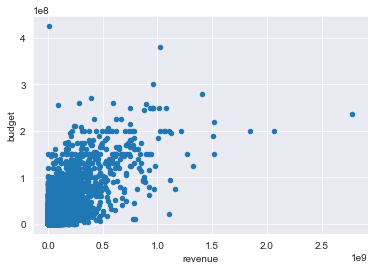

In [35]:
# visualize scatter between features
df_c.plot(x="revenue", y="budget", kind="scatter");

#### <font color='orange'>Found positive relationship between revenue and budget.</font>

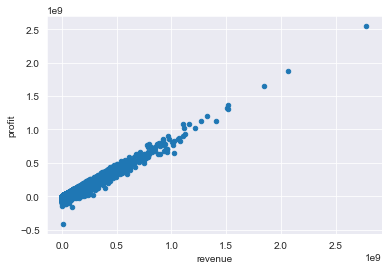

In [36]:
df_c.plot(x="revenue", y="profit", kind="scatter");

#### <font color='orange'>Found perfectly positive relationship between revenue and profit.<br> Because profit is calculated base on generated revenue.</font>

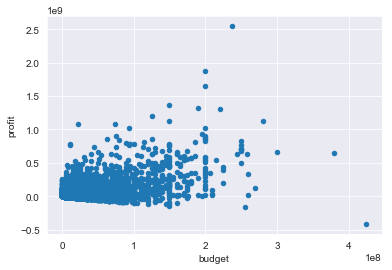

In [37]:
df_c.plot(x="budget", y="profit", kind="scatter");

#### <font color='orange'>Found positive relationship between profit and budget.</font>

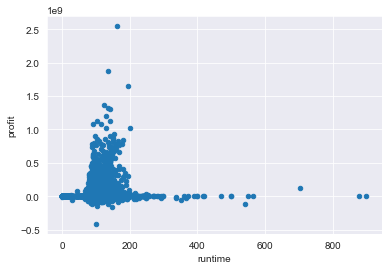

In [38]:
df_c.plot(x="runtime", y="profit", kind="scatter");

#### <font color='orange'>Found that 100-200 minutes runnning times was the most profitable scheme.</font>

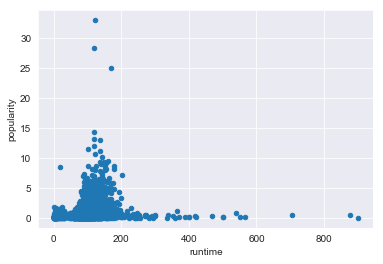

In [39]:
df_c.plot(x="runtime", y="popularity", kind="scatter");

#### <font color='orange'>Found that 100-200 minutes runnning times was also the most popular too.</font>

In [40]:
# explore genres column
df_c.genres.describe()

count     10800
unique       20
top       Drama
freq       2447
Name: genres, dtype: object

In [41]:
df_c.genres.unique()

array(['Adventure', 'Fantasy', 'Comedy', 'Science Fiction', 'Drama',
       'Animation', 'Romance', 'Action', 'Documentary', 'Horror',
       'History', 'Family', 'Western', 'Mystery', 'Crime', 'Thriller',
       'Music', 'TV Movie', 'Foreign', 'War'], dtype=object)

In [42]:
# new dataframe for find proportion of genres: Drama
df_drama = df_c.query('genres =="Drama"')['genres'].count()
df_drama

2447

In [43]:
drama_pc = df_drama/df_c.genres.count()
drama_pc

0.22657407407407407

#### <font color='orange'>20 unique genres found.<br>Drama is the most count at 2,477 times or 22.66% from the clean data set.</font>

<a id='conclusions'></a>
## <font color='crimson'>4) Conclusions</font>

### <font color='purple'>Q1: Which genres generated the most profit over the time?</font>

In [44]:
df_c.groupby('genres').sum().profit

genres
Action             57418137853
Adventure          49530172479
Animation          20135612280
Comedy             43884561239
Crime               7617610976
Documentary          666244035
Drama              36341230673
Family              6216564578
Fantasy            11925896473
Foreign                      0
History             1250748175
Horror             10292764476
Music               1252415911
Mystery             1756590111
Romance             4976393563
Science Fiction    11672539853
TV Movie              22500000
Thriller            7020512237
War                 1361341908
Western              486105966
Name: profit, dtype: int64

In [45]:
top_1 = df_c.query('genres in ["Action"]').profit.sum()
top_2 = df_c.query('genres in ["Adventure"]').profit.sum()
top_3 = df_c.query('genres in ["Comedy"]').profit.sum()
top_4 = df_c.query('genres in ["Drama"]').profit.sum()
top_5 = df_c.query('genres in ["Animation"]').profit.sum()

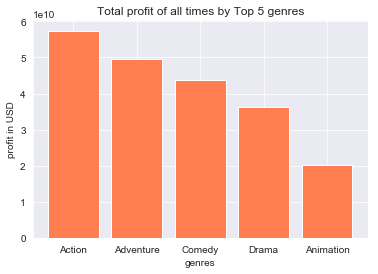

In [46]:
plt.bar(["Action", "Adventure", "Comedy", "Drama", "Animation"], [top_1, top_2, top_3, top_4, top_5], color="coral")
plt.title("Total profit of all times by Top 5 genres")
plt.xlabel("genres")
plt.ylabel("profit in USD");

#### <font color='orange'>In total, Action movies generated the most total profit at 57,418,137,853 usd.</font>

### <font color='purple'>Q2: Are more budget provided to movies in 21st century than 20th century?</font>

In [47]:
df_c.groupby('century')['budget'].describe()

,count,mean,std,min,25%,50%,75%,max
century,,,,,,,,
20th,3914.0,1.121152e+07,2.098833e+07,0.0,0.0,0.0,15000000.0,200000000.0
21st,6886.0,1.670032e+07,3.528097e+07,0.0,0.0,0.0,17500000.0,425000000.0


In [48]:
df_c.query('century == "21st"').budget.mean() - df_c.query('century == "20th"').budget.mean()

5488801.969380084

In [49]:
bud_20 = df_c.query('century in ["20th"]').budget.mean()
bud_21 = df_c.query('century in ["21st"]').budget.mean()

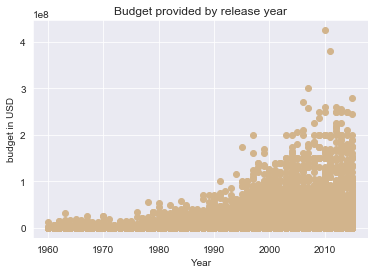

In [50]:
plt.scatter(df_c.release_year, df_c.budget, color="tan")
plt.title("Budget provided by release year")
plt.xlabel("Year")
plt.ylabel("budget in USD");

#### <font color='orange'> Clearly see that movies after 90's got more budget than ever since.</font><br>
#### <font color='orange'>Movies in 21st century get more 5,488,802 usd average budget than movies in 20th century.</font>

### <font color='purple'>Q3: What is the most popular movies in 21st century era, what genres is it and what year it released?</font>

In [51]:
# query only 21st century data
df_max_pop_21 = df_c.query('century == "21st"')
df_max_pop_21.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
3914,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015,1.379999e+08,1.392446e+09,21st,1363528810
3915,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015,1.379999e+08,3.481613e+08,21st,228436354
3916,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015,1.012000e+08,2.716190e+08,21st,185238201
3917,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015,1.839999e+08,1.902723e+09,21st,1868178225
3918,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015,1.747999e+08,1.385749e+09,21st,1316249360


In [52]:
# check popularity rate of the most popular movies in 21st century
df_max_pop_21.popularity.max()

32.985763

In [53]:
# set popularuty to be index
df_pop = df_max_pop_21.set_index('popularity')
df_pop.head()

,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
popularity,,,,,,,,,,,
32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015,1.379999e+08,1.392446e+09,21st,1363528810
28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,2015,1.379999e+08,3.481613e+08,21st,228436354
13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,2015,1.012000e+08,2.716190e+08,21st,185238201
11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,2015,1.839999e+08,1.902723e+09,21st,1868178225
9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,2015,1.747999e+08,1.385749e+09,21st,1316249360


In [54]:
# find the properties of the most popular movies
pop_21 = df_pop.query('popularity == 32.985763')
pop_21

,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
popularity,,,,,,,,,,,
32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015,1.379999e+08,1.392446e+09,21st,1363528810


#### <font color='orange'>Jurassic World is the most popular movies in 21st century.</font><br>
#### <font color='orange'>It's an action movies with released in 2015.</font>

### <font color='purple'>Q4: Who is director of the most popular movies in 20th century and the amount of profit that movie got?</font>

In [55]:
# query only 20th century data
df_max_pop_20 = df_c.query('century == "20th"')
df_max_pop_20.head()

,popularity,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
0,12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure,1977,3.957559e+07,2.789712e+09,20th,764398007
1,2.379469,14000000,185438673,The Spy Who Loved Me,Lewis Gilbert,125,Adventure,1977,5.036893e+07,6.671677e+08,20th,171438673
2,1.719385,1200000,71215869,The Rescuers,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy,1977,4.317337e+06,2.562191e+08,20th,70015869
3,1.179653,4000000,38251425,Annie Hall,Woody Allen,93,Comedy,1977,1.439112e+07,1.376203e+08,20th,34251425
4,1.104997,10000000,0,Pete's Dragon,Don Chaffey,128,Fantasy,1977,3.597781e+07,0.000000e+00,20th,-10000000


In [56]:
# check popularity rate of the most popular movies in 20th century
df_max_pop_20.popularity.max()

12.037933

In [57]:
# set popularuty to be index
df_pop = df_max_pop_20.set_index('popularity')
df_pop.head()

,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
popularity,,,,,,,,,,,
12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure,1977,3.957559e+07,2.789712e+09,20th,764398007
2.379469,14000000,185438673,The Spy Who Loved Me,Lewis Gilbert,125,Adventure,1977,5.036893e+07,6.671677e+08,20th,171438673
1.719385,1200000,71215869,The Rescuers,John Lounsbery|Wolfgang Reitherman|Art Stevens,78,Fantasy,1977,4.317337e+06,2.562191e+08,20th,70015869
1.179653,4000000,38251425,Annie Hall,Woody Allen,93,Comedy,1977,1.439112e+07,1.376203e+08,20th,34251425
1.104997,10000000,0,Pete's Dragon,Don Chaffey,128,Fantasy,1977,3.597781e+07,0.000000e+00,20th,-10000000


In [58]:
# find the properties of the most popular movies
pop_20 = df_pop.query('popularity == 12.037933')
pop_20

,budget,revenue,original_title,director,runtime,genres,release_year,budget_adj,revenue_adj,century,profit
popularity,,,,,,,,,,,
12.037933,11000000,775398007,Star Wars,George Lucas,121,Adventure,1977,3.957559e+07,2.789712e+09,20th,764398007


#### <font color='orange'>Star Wars is the most popular movies in 20th century.</font><br>
#### <font color='orange'>The director is George Lucas and it generated profit 764,398,007 usd.</font>

### <font color='purple'>Q5: Are there association between the run time and other features?</font>

In [59]:
# consider median of runtime with features roughly
df_c.groupby(['century','genres']).median()

popularity      budget     revenue  runtime  \
century genres                                                         
20th    Action             0.387981    360000.0   2275557.0    104.0   
        Adventure          0.534980   7000000.0  13504408.5    107.0   
        Animation          0.431932         0.0         0.0     77.0   
        Comedy             0.349526         0.0         0.0     98.0   
        Crime              0.424045   2000000.0   7892145.5    110.0   
        Documentary        0.146683         0.0         0.0     98.0   
        Drama              0.360130         0.0         0.0    112.0   
        Family             0.489761         0.0         0.0     89.5   
        Fantasy            0.402621         3.0        16.0    100.0   
        Foreign            0.205712         0.0         0.0    125.0   
        History            0.381352  15000000.0         0.0    125.0   
        Horror             0.324254    437500.0         0.0     93.0   
        Music              0.380140   3600000.0   1958151.5    108.5   
        Mystery            0.334813         0.0         0.0    107.5   
        Romance            0.495616   2750000.0   7151746.0    106.0   
        Science Fiction    0.488700  10500000.0   4884663.0    103.0   
        TV Movie           0.161600         0.0         0.0     95.0   
        Thriller           0.390811    125000.0         0.0    104.5   
        War                0.293158         0.0         0.0    129.0   
        Western            0.319636         0.0         0.0    109.0   
21st    Action             0.484414   9000000.0     10698.5     98.0   
        Adventure          0.676655  21000000.0  11109229.0    100.0   
        Animation          0.538755         0.0         0.0     77.0   
        Comedy             0.378725         0.0         0.0     95.0   
        Crime              0.451804   3000000.0      7879.0    104.0   
        Documentary        0.142518         0.0         0.0     93.0   
        Drama              0.383044         0.0         0.0    104.0   
        Family             0.418932         0.0         0.0     88.5   
        Fantasy            0.527458    800000.0         0.0     96.0   
        Foreign            0.136851         0.0         0.0     94.5   
        History            0.370540         0.0       641.0    113.0   
        Horror             0.335800         0.0         0.0     90.0   
        Music              0.272431         0.0         0.0    104.5   
        Mystery            0.331665         0.0         0.0     96.0   
        Romance            0.339709         0.0         0.0    100.0   
        Science Fiction    0.469332      7000.0         0.0     93.0   
        TV Movie           0.221355         0.0         0.0     90.0   
        Thriller           0.463427         0.0         0.0     96.0   
        War                0.507092     10000.0         0.0    113.0   
        Western            0.815044  22000000.0   2429989.0    115.0   

                         release_year    budget_adj   revenue_adj    profit  
century genres                                                               
20th    Action                 1990.0  1.350569e+06  3.444327e+06       0.0  
        Adventure              1988.5  2.550264e+07  2.746045e+07       0.0  
        Animation              1993.0  0.000000e+00  0.000000e+00       0.0  
        Comedy                 1991.0  0.000000e+00  0.000000e+00       0.0  
        Crime                  1989.0  6.810459e+06  1.587932e+07   37146.5  
        Documentary            1989.0  0.000000e+00  0.000000e+00       0.0  
        Drama                  1991.0  0.000000e+00  0.000000e+00       0.0  
        Family                 1994.0  0.000000e+00  0.000000e+00       0.0  
        Fantasy                1991.0  5.006696e+00  2.670238e+01       0.0  
        Foreign                1995.0  0.000000e+00  0.000000e+00       0.0  
        History                1995.0  3.566559e+07  0.000000e+0

In [60]:
df_20 = df_c.query('century == "20th"')
runt_20 = np.array(df_20.runtime)

In [61]:
df_21 = df_c.query('century == "21st"')
runt_21 = np.array(df_21.runtime)

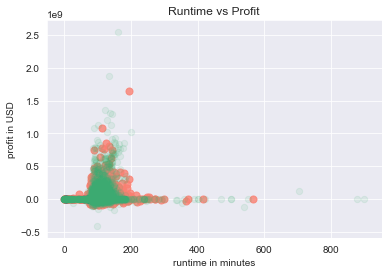

In [62]:
plt.scatter(df_20.runtime, df_20.profit, color='salmon', s=50, alpha=.8, label='20th')
plt.scatter(df_21.runtime, df_21.profit, color='mediumseagreen', s=40, alpha=.1, label='21st')
plt.title("Runtime vs Profit")
plt.xlabel("runtime in minutes")
plt.ylabel("profit in USD");

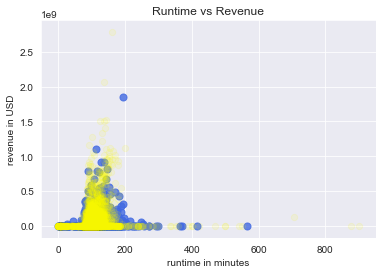

In [63]:
plt.scatter(df_20.runtime, df_20.revenue, color='royalblue', s=50, alpha=.8, label='20th')
plt.scatter(df_21.runtime, df_21.revenue, color='yellow', s=40, alpha=.1, label='21st')
plt.title("Runtime vs Revenue")
plt.xlabel("runtime in minutes")
plt.ylabel("revenue in USD");

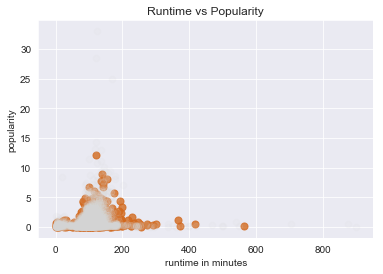

In [64]:
plt.scatter(df_20.runtime, df_20.popularity, color='chocolate', s=50, alpha=.8, label='20th')
plt.scatter(df_21.runtime, df_21.popularity, color='gainsboro', s=40, alpha=.1, label='21st')
plt.title("Runtime vs Popularity")
plt.xlabel("runtime in minutes")
plt.ylabel("popularity");

#### <font color='orange'>Longer runtime does not mean high gain in either amount of money and popularity.</font>

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Reference Web sites<br>
https://matplotlib.org/examples/color/named_colors.html<br>
https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html<br>
https://stackoverflow.com/questions/41906199/how-to-make-a-new-line-in-a-jupyter-markdown-cell